In [20]:
import torch
import torchvision
from torchvision import datasets,transforms,models
import os
import numpy as np
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler

In [62]:

class ImageFolderWithPaths(datasets.ImageFolder):
    """
    Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """
    def __init__(self,root,tranf):
        super(ImageFolderWithPaths,self).__init__(root,tranf)
    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super().__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        imgname= path.split('/')[-1]
        #print(f"path {path} index {index}")
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,imgname))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader

batchsize=4

dataroot='./hymenoptera_data/'
data_transforms={ 
                 'train': transforms.Compose([transforms.RandomResizedCrop(224), 
                                              transforms.RandomHorizontalFlip(),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                             ]),
                 'val':   transforms.Compose([transforms.Resize(256), 
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                             ]),
                }

datasets_reqd={x: ImageFolderWithPaths(os.path.join(dataroot,x), data_transforms[x]) for x in ['train','val']}

dataloader={ x: torch.utils.data.DataLoader(datasets_reqd[x], batch_size=batchsize, num_workers=4 , shuffle=True) for x in ['train','val']}


datalength= { x : len(datasets_reqd[x]) for x in ['train','val']}


classes=datasets_reqd['train'].classes

device=torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
classes


['ants', 'bees']

In [10]:
import random
for inputs, labels , path, imgname in dataloader['train']:
    # use the above variables freely
    #print(labels, paths)
    #print((imgname))
    with open("data_anam1.txt", "a+") as f: 
        f.write(str(imgname))
        f.write(str(random.randint(0,len(dataloader))))
        f.write('\n')
#     dataiter = iter(dataloader)
#     batch = dataiter.next()

In [91]:
import numpy as np
a=np.random.randn(1, 4)
b=np.random.randn(1, 4)
print(a,b)
list(zip(a,b))

[[-1.76625192 -0.34169392  1.79144308  0.7826047 ]] [[-5.09961752e-01  1.28872071e+00 -4.60608098e-01  1.01767849e-03]]


[(array([-1.76625192, -0.34169392,  1.79144308,  0.7826047 ]),
  array([-5.09961752e-01,  1.28872071e+00, -4.60608098e-01,  1.01767849e-03]))]

In [107]:
import random
x=[1,2,3,4]
for inputs, labels , path, imgname in dataloader['train']:
    for i in range(inputs.shape[0]):
        print(imgname[i])
        print('-')
        print(str(imgname[i]).split('_')[0])
        print('\n')

531979952_bde12b3bc0.jpg
-
531979952


662541407_ff8db781e7.jpg
-
662541407


6240338_93729615ec.jpg
-
6240338


459694881_ac657d3187.jpg
-
459694881


1262877379_64fcada201.jpg
-
1262877379


2019439677_2db655d361.jpg
-
2019439677


196430254_46bd129ae7.jpg
-
196430254


49375974_e28ba6f17e.jpg
-
49375974


822537660_caf4ba5514.jpg
-
822537660


2601176055_8464e6aa71.jpg
-
2601176055


506249836_717b73f540.jpg
-
506249836


1092977343_cb42b38d62.jpg
-
1092977343


2330918208_8074770c20.jpg
-
2330918208


2861002136_52c7c6f708.jpg
-
2861002136


649026570_e58656104b.jpg
-
649026570


1097045929_1753d1c765.jpg
-
1097045929


1286984635_5119e80de1.jpg
-
1286984635


1924473702_daa9aacdbe.jpg
-
1924473702


36900412_92b81831ad.jpg
-
36900412


1030023514_aad5c608f9.jpg
-
1030023514


2683605182_9d2a0c66cf.jpg
-
2683605182


2345177635_caf07159b3.jpg
-
2345177635


1808777855_2a895621d7.jpg
-
1808777855


trap-jaw-ant-insect-bg.jpg
-
trap-jaw-ant-insect-bg.jpg


1693954099_46d4c20605.jpg
-

457457145_5f86eb7e9c.jpg
-
457457145


509247772_2db2d01374.jpg
-
509247772


386190770_672743c9a7.jpg
-
386190770


2486729079_62df0920be.jpg
-
2486729079


VietnameseAntMimicSpider.jpg
-
VietnameseAntMimicSpider.jpg


207947948_3ab29d7207.jpg
-
207947948


512863248_43c8ce579b.jpg
-
512863248


6240329_72c01e663e.jpg
-
6240329


2053200300_8911ef438a.jpg
-
2053200300


2710368626_cb42882dc8.jpg
-
2710368626


684133190_35b62c0c1d.jpg
-
684133190


2617161745_fa3ebe85b4.jpg
-
2617161745




In [103]:
for inputs, labels , path, imgname in dataloader['train']:
    
    loss=torch.randn(1,4)
    loss=loss.numpy()
    for i in range(4):
        print(imgname[i],loss[i]ll)

95238259_98470c5b10.jpg [ 0.7011744  -0.54666746 -0.3887371   0.7581178 ]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [94]:
import torch
torch.randn(1,16)

tensor([[-0.3675,  0.8482,  0.2686, -0.3149, -1.3644,  1.8511, -1.3294,  2.6268,
         -1.3342,  0.2552,  1.4071, -0.8320,  1.7215, -0.1387, -0.7022,  0.0047]])

In [ ]:
class_names

def imgshow(img):
    im=img.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    im= std*im + mean
    plt.imshow(im)
    

In [ ]:
images,labels= iter(dataloader['train']).next()
images=torchvision.utils.make_grid(images)
imgshow(images)

In [32]:
x=[1,3,5,7,9]
y=[2,4,6,8,10]
str(list(zip(x,y)))

'[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]'

In [64]:
x=[1,2,3,4]
y=['abc', 'def', 'ghi', 'jkl']

'abc'

array(['def'], dtype='<U3')

In [80]:
Imagename=[]
Predictions=[]
Actual=[]

def train_model(model, criterion, optimizer, scheduler , num_epochs=25):
    since=time.time()
    best_model_wts=copy.deepcopy(model.state_dict())
    best_acc = 0.0
    i=0

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase=='train':
                scheduler.step()
                model.train()
            else:
                model.eval()
            running_loss=0
            running_corrects=0
            for images , labels , paths, imgname in dataloader[phase]:
            
                images=images.to(device)
                labels=labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase=='train'):
                    
                    outputs=model(images)
                    _,predictions=torch.max(outputs,1)
                    loss=criterion(outputs,labels)
                    if phase=='train':
                        loss.backward()
                        optimizer.step()
                running_loss+=loss.item()*images.size(0)
                running_corrects+=torch.sum(predictions == labels.data)
                for j in range(images.shape[0]):
                    Imagename.append((str(list(imgname)[j])))
                    Predictions.append(str(classes[predictions.numpy()[j]]))
                    Actual.append(str(classes[labels.numpy()[j]]))
                    
            epoch_loss=running_loss/datalength[phase]
            epoch_acc=running_corrects.double()/datalength[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            
            if phase=='val' and epoch_acc>best_acc:
                best_acc=epoch_acc
                best_model_wts=copy.deepcopy(model.state_dict())
    model.load_state_dict(best_model_wts)    
    return model
            

In [72]:
import torch.nn as nn
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [81]:
import time
import copy
model_conv = train_model(model_ft, criterion, optimizer_ft,
                         exp_lr_scheduler, num_epochs=1)


train Loss: 0.4886 Acc: 0.7705
val Loss: 0.2076 Acc: 0.9085


In [74]:
import pandas as pd

df = pd.DataFrame({'Images': Imagename,
                  'Predicted': Predictions , 'Actual': Actual})


writer = pd.ExcelWriter('Predictions.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
workbook=writer.book
worksheet = writer.sheets['Sheet1']

format = workbook.add_format({'text_wrap': True})

# Setting the format but not setting the column width.
worksheet.set_column('A:B', None, format)

writer.save()


In [77]:
patients=[]
p=subprocess.Popen('find ./ -name "*.jpg" |cut -d "_" -f 1 | uniq ', stdout=subprocess.PIPE ,shell=True)
out=p.communicate()[0] 
for line in out.splitlines():
    patients.append(line.decode("utf-8").split('./')[1])

In [ ]:
import torch
from torchvision import datasets,models
import numpy as np
import torch.nn as nn
import torch.utils
import os
import torchvision
import torch.optim as optim
import copy

# Datalaoding, dataset preparation , transformations

In [ ]:
T          = {'train' : transforms.Compose([ transforms.RandomResizedCrop(224),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
                                            ]),
             
            'val':  transforms.Compose([ transforms.RandomResizedCrop(224),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
                                            ]) 

             }
root= './hymenoptera_data'
dataset_reqd = { x : datasets.ImageFolder(os.path.join(root,x), T[x]) for x in ['train','val']}
dataloader_reqd= { x : torch.utils.data.DataLoader(dataset_reqd[x], batch_size=4 , num_workers=4, shuffle=True) for x in ['train', 'val']}
            
datalength= { x : len(dataset_reqd[x]) for x in ['train' , 'val']}

image,labels= iter(dataloader_reqd['train']).next()
labels          

# ImageDisplay

In [ ]:
from matplotlib import pyplot as plt
def imageshow(im):
    im_np= im.numpy()
    im_np= np.transpose(im_np, (1,2,0))
    im_np=im_np*0.5 + 0.5 
    plt.imshow(im_np)
images,labels = iter(dataloader_reqd['train']).next()
images=torchvision.utils.make_grid(images)
imageshow(images)
#images

# Define Network

In [ ]:
#Define network if exists

In [ ]:
def training_model(model , scheduler , optim, criterion):
    best_model=copy.deepcopy(model.state_dict())
    best_acc=0
    for epoch in range(num_epochs):
        for phase in ['train','val']:
            if phase=='train':
                scheduler.step()
                model.train()
            if phase == 'val':
                model.eval
            running_loss=0
            running_correctness=0
            
            for images,labels in dataloader_reqd[phase]:
                images=images.to(device)
                labels = labels.to(device)
                optim.zero_grad()
            
                with torch.set_grad_enabled(phase=='train'):
                    output = model(images)
                    loss = criterion(output,labels)
                    _,predictions= torch.max(output,1)
                       
                    if phase == 'train':
                        loss.backward()
                        optim.step()
                running_loss+=loss*images.shape(0)
                running_correctness += torch.sum(predictions==labels)
            epoch_loss= running_loss/datalength[phase]
            epoch_correctness= running_correctness.double()/datalength[phase]
            print("{} , {} " .format(epoch_loss,epoch_correctness))
            
            if phase=='val' and epoch_correctness > best_acc:
                best_acc=epoch_correctness
                best_model=copy.deepcopy(model.state_dict())
                
    model.load_state_dict(best_model)
    return model
            



# Optimizer

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [138]:
d={}
d['a'] =1 
d['b'] = 2
d['c'] =1
keys=[]
values=[]
for i in d.keys():
    keys.append(i)
    values.append(d[i])
values
#d.values().count(1)
list(d.keys())[0]

'a'

In [129]:
a=['cancer', 'normal','cancer', 'normal','cancer', 'cancer','cancer', 'cancer',]
a.count('cancer')

6

In [1]:
import pickle
with open("./list_val/KIRP_mod5/images_pred.txt", "rb") as fp:
    im_pred=pickle.load(fp)

with open("./list_val/KIRP_mod5//predictions.txt", "rb") as fp:
    pred=pickle.load(fp)

with open("./list_val/KIRP_mod5/Groundtruth_patchwise.txt", "rb") as fp:
    actual=pickle.load(fp)

with open("./list_val/KIRP_mod5/cancer_count_pred.txt", "rb") as fp:
    cancer_count_pred=pickle.load(fp)

with open("./list_val/KIRP_mod5/normal_count_pred.txt", "rb") as fp:
    normal_count_pred=pickle.load(fp)

with open("./list_val/KIRP_mod5/cancer_count_actual.txt", "rb") as fp:
    cancer_count_actual=pickle.load(fp)
    
with open("./list_val/KIRP_mod5/normal_count_actual.txt", "rb") as fp:
    normal_count_actual=pickle.load(fp)

with open("./list_val/KIRP_mod5/cancer_count_pred.txt", "rb") as fp:
    cancer_count_pred=pickle.load(fp)

with open("./list_val/KIRP_mod5/Groundtruth_slidewise.txt", "rb") as fp:
    GT_patchwise=pickle.load(fp)
    
    
    

In [198]:
list(zip(cancer_count_actual,normal_count_actual))
list(zip(cancer_count_pred,normal_count_pred))
len(GT_patchwise)

for i in range(len(cancer_count_actual)):
    if (normal_count_actual[i]>cancer_count_actual[i]) and (cancer_count_pred[i]>normal_count_pred[i]):
        print(im_pred[i])

TCGA-A4-A57E-11A-01-TS1.1CC7185A-BACC-45FF-BE39-93E25FB9996A
TCGA-A4-A5Y0-11A-01-TS1.A819CDA6-6C60-4EB5-B19C-60563B1A2A02
TCGA-A4-A6HP-11A-01-TS1.FCACEAF8-6C12-4B5F-8CEA-5FE0A1485676
TCGA-B3-3925-11A-01-TS1.59c23c72-802f-4ad2-b35b-9075e3eeb2b3
TCGA-GL-A59T-11A-01-TS1.C10B5D1F-A12A-47B5-BE85-E8D649C1C2E4
TCGA-Y8-A8RZ-11A-01-TS1.67491A24-94D0-494B-9742-39678D009C3C


In [201]:
list(zip(cancer_count_actual,normal_count_actual))
list(zip(cancer_count_pred,normal_count_pred))
len(GT_patchwise)



TCGA-A4-A57E-11A-01-TS1.1CC7185A-BACC-45FF-BE39-93E25FB9996A
370 0
34 336
TCGA-A4-A5Y0-11A-01-TS1.A819CDA6-6C60-4EB5-B19C-60563B1A2A02
807 0
314 493
TCGA-A4-A6HP-11A-01-TS1.FCACEAF8-6C12-4B5F-8CEA-5FE0A1485676
791 0
25 766
TCGA-B3-3925-11A-01-TS1.59c23c72-802f-4ad2-b35b-9075e3eeb2b3
609 0
78 531
TCGA-GL-A59T-11A-01-TS1.C10B5D1F-A12A-47B5-BE85-E8D649C1C2E4
121 0
26 95
TCGA-Y8-A8RZ-11A-01-TS1.67491A24-94D0-494B-9742-39678D009C3C
193 0
44 149


In [237]:
for i in range(len(cancer_count_actual)):
    if (normal_count_actual[i]>cancer_count_actual[i]) and (cancer_count_pred[i]>normal_count_pred[i]):
        print(im_pred[i])
        print(normal_count_actual[i],cancer_count_actual[i])
        print(normal_count_pred[i] ,cancer_count_pred[i])

TCGA-KL-8329-11A-01-TS1.55cef38f-9e3a-47aa-af40-e2b889a8e4a1
11224 0
4639 6585
TCGA-KN-8421-11A-01-TS1.62126a43-93e4-490e-bcc1-df50f4075851
2589 0
971 1618
TCGA-KN-8430-11A-01-TS1.aa5a7373-34cb-445c-ba94-bc37f78537b4
5778 0
1506 4272
TCGA-KO-8405-11A-01-TS1.255ca3a3-1579-4dfa-88c2-6dc70f2e7ac8
2912 0
1453 1459
TCGA-KO-8415-11A-01-TS1.a291096e-6b62-41b7-a571-60fa196357ad
4332 0
1901 2431
TCGA-UW-A7GI-11Z-00-DX1.3D506541-C999-4897-B21B-2211ADB364AE
11884 0
3804 8080


In [226]:
for i in range(len(cancer_count_actual)):
    if (normal_count_actual[i]<cancer_count_actual[i]) and (cancer_count_pred[i]<normal_count_pred[i]):
        print(im_pred[i])
        print(normal_count_actual[i],cancer_count_actual[i])
        print(normal_count_pred[i] ,cancer_count_pred[i])

TCGA-BQ-5886-01A-01-TS1.2ed30241-45a3-4d5c-be14-f4ef6494c02d
0 1408
837 571


In [229]:
for i in range(len(cancer_count_actual)):
    if (normal_count_actual[i]>cancer_count_actual[i]) and (cancer_count_pred[i]>normal_count_pred[i]):
        print(im_pred[i])
        print(normal_count_actual[i],cancer_count_actual[i])
        print(normal_count_pred[i] ,cancer_count_pred[i])

In [230]:
for i in range(len(cancer_count_actual)):
    if (normal_count_actual[i]<cancer_count_actual[i]) and (cancer_count_pred[i]<normal_count_pred[i]):
        print(im_pred[i])
        print(normal_count_actual[i],cancer_count_actual[i])
        print(normal_count_pred[i] ,cancer_count_pred[i])

TCGA-KN-8426-01A-01-TS1.e53a4425-2aee-4706-ab5e-c800b2455fa4
0 28
28 0
TCGA-KN-8428-01A-01-BS1.5a59e77e-f8fb-4b0d-ab7d-193b3df684d9
0 6729
4978 1751
TCGA-KN-8432-01A-01-TS1.2ee6adff-a00e-4095-bed4-74882a148f0d
0 3123
2496 627
TCGA-KO-8406-01A-01-TS1.7b3f0605-de4d-4691-a5d5-cee6b1712636
0 1240
755 485
TCGA-UW-A7GJ-01Z-00-DX1.5CA0FD93-E237-4AEC-84D6-0199A62105DE
0 17786
17088 698


In [2]:
import pandas as pd

df = pd.DataFrame({'Images': im_pred,'Predicted_patchwise': pred ,'Actual_patchwise' : actual, 'SLidewise_GT':GT_patchwise , 'Actual (C,N)':list(zip(cancer_count_actual,normal_count_actual)) , 'Predicted (C,N)':list(zip(cancer_count_pred,normal_count_pred))  })




writer = pd.ExcelWriter('Predictions_KIRP_mod_proper5.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
workbook=writer.book
worksheet = writer.sheets['Sheet1']

#format = workbook.add_format({'text_wrap': True})
format = workbook.add_format({'num_format': '#,##0.00'})
# Setting the format but not setting the column width.
worksheet.set_column('A:B', None, format)

writer.save()



In [11]:
import torch
from torch.autograd import Variable
x= Variable(1000*torch.ones(1,1),requires_grad=True)
x

tensor([[1000.]], requires_grad=True)

In [202]:
for i in d_pred.keys():
    print(d_pred[i].count('cancer'))
    print(d_pred[i].count('normal'))
    if d_pred[i].count('cancer') > d_pred[i].count('normal'):

        patient_pred[i]='cancer'
    if d_pred[i].count('cancer') < d_pred[i].count('normal'):
        patient_pred[i]='normal'
    print(patient_pred[i])


NameError: name 'd_pred' is not defined

<function matplotlib.pyplot.show(*args, **kw)>

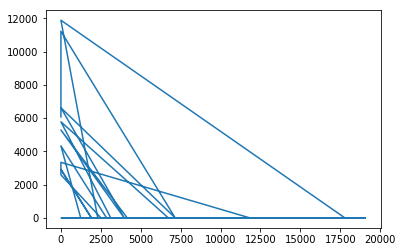

In [242]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(cancer_count_actual,normal_count_actual)
plt.show

In [ ]:
import os, sys
sys.path.append(os.getcwd())

import time
import functools
import argparse

import numpy as np
#import sklearn.datasets

import libs as lib
import libs.plot
from tensorboardX import SummaryWriter
from torch.autograd import Variable
import pdb
import gpustat

from models.wgan import *

import torch
import torchvision
from torch import nn
from torch import autograd
from torch import optim
from torchvision import transforms, datasets
from torch.autograd import grad
from timeit import default_timer as timer

import torch.nn.init as init

# lsun lmdb data set can be download via https://github.com/fyu/lsun
# 64x64 ImageNet at http://image-net.org/small/download.php
DATA_DIR = '/ssd_scratch/cvit/ashish/KIRP_wgan' # Replace your image data path here
VAL_DIR = '/ssd_scratch/cvit/ashish/KIRP_wgan'
IMAGE_DATA_SET = 'KIRP_wgan' 
# change this to something else, e.g. 'imagenets' or 'raw' if your data is just a folder of raw images. 
# Example: 
# IMAGE_DATA_SET = 'raw'
# If you use lmdb, you'll need to write the loader by yourself. Please check load_data function

TRAINING_CLASS = ['train'] # IGNORE this if you are NOT training on lsun, or if you want to train on other classes of lsun, then change it accordingly
VAL_CLASS = ['valid'] # IGNORE this if you are NOT training on lsun, or if you want to train on other classes of lsun, then change it accordingly


parser = argparse.ArgumentParser()
parser.add_argument('--ngpu')
parser.add_argument('--startiter')
args = parser.parse_args()


ngpu=int(args.ngpu)

if len(DATA_DIR) == 0:
    raise Exception('Please specify path to data directory in gan_64x64.py!')

RESTORE_MODE = False # if True, it will load saved model from OUT_PATH and continue to train
START_ITER = int(args.startiter) # starting iteration 
OUTPUT_PATH = './output/' # output path where result (.e.g drawing images, cost, chart) will be stored
# MODE = 'wgan-gp'
DIM = 256 # Model dimensionality
CRITIC_ITERS = 5 # How many iterations to train the critic for
GENER_ITERS = 1
N_GPUS = 4 # Number of GPUs
BATCH_SIZE = 20# Batch size. Must be a multiple of N_GPUS
END_ITER = 75000 # How many iterations to train for
LAMBDA = 10 # Gradient penalty lambda hyperparameter
OUTPUT_DIM = 256*256*3 # Number of pixels in each image

def showMemoryUsage(device=1):
    gpu_stats = gpustat.GPUStatCollection.new_query()
    item = gpu_stats.jsonify()["gpus"][device]
    print('Used/total: ' + "{}/{}".format(item["memory.used"], item["memory.total"]))

device1 = torch.device("cpu")
def weights_init(m):
    if isinstance(m, MyConvo2d): 
        if m.conv.weight is not None:
            if m.he_init:
                init.kaiming_uniform_(m.conv.weight)
            else:
                init.xavier_uniform_(m.conv.weight)
        if m.conv.bias is not None:
            init.constant_(m.conv.bias, 0.0)
    if isinstance(m, nn.Linear):
        if m.weight is not None:
            init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0.0)

def load_data(path_to_folder, classes):
    data_transform = transforms.Compose([
                 transforms.Scale(256),
                 transforms.CenterCrop(256),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                ])
    if IMAGE_DATA_SET == 'lsun':
        dataset =  datasets.LSUN(path_to_folder, classes=classes, transform=data_transform)
    else:
        dataset = datasets.ImageFolder(root=path_to_folder,transform=data_transform)
    dataset_loader = torch.utils.data.DataLoader(dataset,batch_size=BATCH_SIZE, shuffle=True, num_workers=5)
    return dataset_loader

def training_data_loader():
    return load_data(DATA_DIR, TRAINING_CLASS) 

def val_data_loader():
    return load_data(VAL_DIR, VAL_CLASS) 

def calc_gradient_penalty(netD, real_data, fake_data):
    rd=real_data.clone().cpu()
    bs=rd.shape[0]
    alpha = torch.rand(bs, 1)
    alpha = alpha.expand(bs, int(real_data.nelement()/bs)).contiguous()
    alpha = alpha.view(bs, 3, DIM, DIM)
    alpha = alpha.to(device)
    
    fake_data = fake_data.view(bs, 3, DIM, DIM)
    interpolates = alpha * real_data.detach() + ((1 - alpha) * fake_data.detach())

    interpolates = interpolates.to(device)
    interpolates.requires_grad_(True)

    disc_interpolates = netD(interpolates)

    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones(disc_interpolates.size()).to(device),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

    gradients = gradients.view(gradients.size(0), -1)                              
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA
    return gradient_penalty

def generate_image(netG, noise=None):
    if noise is None:
        noise = gen_rand_noise()

    with torch.no_grad():
    	noisev = noise 
    samples = netG(noisev)
    samples = samples.view(BATCH_SIZE, 3, 256, 256)
    samples = samples * 0.5 + 0.5
    samples=samples.cpu()
    return samples

def gen_rand_noise():
    noise = torch.randn(BATCH_SIZE, 128)
    noise = noise.to(device)

    return noise

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")
fixed_noise = torch.randn(BATCH_SIZE, 128).to(device)

if RESTORE_MODE:
    aG = GoodGenerator().to(device)
    if (device.type == 'cuda') and (ngpu > 1):
        aG = nn.DataParallel(aG, list(range(ngpu)))
    aG.load_state_dict(torch.load(OUTPUT_PATH + "generator.pth"))
    aD = GoodDiscriminator(out_feat=False).to(device)
    if (device.type == 'cuda') and (ngpu > 1):
        aD = nn.DataParallel(aD, list(range(ngpu)))
    aD.load_state_dict(torch.load(OUTPUT_PATH + "discriminator.pth"))
    aG_cpu = GoodGenerator()
    aG_cpu = nn.DataParallel(aG_cpu)
    aG_cpu.load_state_dict(torch.load(OUTPUT_PATH + "generator.pth", map_location=device1))
else:
    aG = GoodGenerator()
    aD = GoodDiscriminator(out_feat=False)
    aG_cpu = GoodGenerator()
    aG.apply(weights_init)
    aD.apply(weights_init)
    aG_cpu.apply(weights_init)
    aG = aG.to(device)
    aD = aD.to(device)

    if (device.type == 'cuda') and (ngpu > 1):
        aG = nn.DataParallel(aG, list(range(ngpu)))
        aD = nn.DataParallel(aD, list(range(ngpu)))
        aG_cpu = nn.DataParallel(aG_cpu)



LR = 1e-4
optimizer_g = torch.optim.Adam(aG.parameters(), lr=LR, betas=(0,0.9))
optimizer_d = torch.optim.Adam(aD.parameters(), lr=LR, betas=(0,0.9))
one = torch.FloatTensor([1])
mone = one * -1
one = one.to(device)
mone = mone.to(device)





writer = SummaryWriter()
#Reference: https://github.com/caogang/wgan-gp/blob/master/gan_cifar10.py

"""
def train():
   
    dataloader = training_data_loader()
    iteration=0 
    for epoch in range(5): 
        for _, images in enumerate(dataloader):
            iteration+=1
            start_time = time.time()
            print("Iter: " + str(iteration))
            start = timer()
            #---------------------TRAIN G------------------------
            for p in aD.parameters():
                p.requires_grad_(False)  # freeze D

            gen_cost = None
            for i in range(GENER_ITERS):
                print("Generator iters: " + str(i))
                aG.zero_grad()
                noise = gen_rand_noise()
                noise.requires_grad_(True)
                fake_data = aG(noise)
                gen_cost = aD(fake_data)
                gen_cost = gen_cost.mean()
                gen_cost.backward(mone)
                gen_cost = -gen_cost

            optimizer_g.step()
            end = timer()
            print(f'---train G elapsed time: {end - start}')
            #---------------------TRAIN D------------------------
            for p in aD.parameters():  # reset requires_grad
                p.requires_grad_(True)  # they are set to False below in training G
            for i in range(CRITIC_ITERS):
                print("Critic iter: " + str(i))

                start = timer()
                aD.zero_grad()

                # gen fake data and load real data
                noise = gen_rand_noise()
                with torch.no_grad():
                    noisev = noise  # totally freeze G, training D
                fake_data = aG(noisev).detach()
                end = timer(); print(f'---gen G elapsed time: {end-start}')
                start = timer()
                #batch = batch[0] #batch[1] contains labels
                imgs = torch.Tensor(images[0])
                real_data = imgs.to(device)
                #real_data = images.to(device) #TODO: modify load_data for each loading
                end = timer(); print(f'---load real imgs elapsed time: {end-start}')
                start = timer()

                # train with real data
                disc_real = aD(real_data)
                disc_real = disc_real.mean()

                # train with fake data
                disc_fake = aD(fake_data)
                disc_fake = disc_fake.mean()

                #showMemoryUsage(0)
                # train with interpolates data
                gradient_penalty = calc_gradient_penalty(aD, real_data, fake_data)
                #showMemoryUsage(0)

                # final disc cost
                disc_cost = disc_fake - disc_real + gradient_penalty
                disc_cost.backward()
                w_dist = disc_fake  - disc_real
                optimizer_d.step()
                #------------------VISUALIZATION----------
                if i == CRITIC_ITERS-1:
                    
                    writer.add_scalar('data/disc_cost', disc_cost, iteration)
                    #writer.add_scalar('data/disc_fake', disc_fake, iteration)
                    #writer.add_scalar('data/disc_real', disc_real, iteration)
                    writer.add_scalar('data/gradient_pen', gradient_penalty, iteration)
                    #writer.add_scalar('data/d_conv_weight_mean', [i for i in aD.children()][0].conv.weight.data.clone().mean(), iteration)
                    #writer.add_scalar('data/d_linear_weight_mean', [i for i in aD.children()][-1].weight.data.clone().mean(), iteration)
                    #writer.add_scalar('data/fake_data_mean', fake_data.mean())
                    #writer.add_scalar('data/real_data_mean', real_data.mean())
                    #if iteration %200==99:
                    #    paramsD = aD.named_parameters()
                    #    for name, pD in paramsD:
                    #        writer.add_histogram("D." + name, pD.clone().data.cpu().numpy(), iteration)
                    
                    if iteration %200==199:
                        body_model = [i for i in aD.children()][0]
                        layer1 = body_model.conv1.conv
                        xyz = layer1.weight.data.clone()
                        tensor = xyz.cpu()
                        tensors = torchvision.utils.make_grid(tensor, nrow=8,padding=1)
                        writer.add_image('D/conv1', tensors, iteration)
                    

                end = timer(); print(f'---train D elapsed time: {end-start}')
        #---------------VISUALIZATION---------------------

            writer.add_scalar('data/gen_cost', gen_cost, iteration)
            lib.plot.plot(OUTPUT_PATH + 'time', time.time() - start_time)
            lib.plot.plot(OUTPUT_PATH + 'train_disc_cost', disc_cost.cpu().data.numpy())
            lib.plot.plot(OUTPUT_PATH + 'train_gen_cost', gen_cost.cpu().data.numpy())
            lib.plot.plot(OUTPUT_PATH + 'wasserstein_distance', w_dist.cpu().data.numpy())
            if iteration % 200 == 199:
                
                val_loader = val_data_loader() 
                dev_disc_costs = []
                for _, images in enumerate(val_loader):
                    imgs = torch.Tensor(images[0])
                    imgs = imgs.to(device)
                    with torch.no_grad():
                        imgs_v = imgs

                    D = aD(imgs_v)
                    _dev_disc_cost = -D.mean().cpu().data.numpy()
                    dev_disc_costs.append(_dev_disc_cost)
                lib.plot.plot(OUTPUT_PATH + 'dev_disc_cost.png', np.mean(dev_disc_costs))
                lib.plot.flush()	
                
                torch.save(aG.state_dict(),OUTPUT_PATH + "generator.pth")
                torch.save(aD.state_dict(), OUTPUT_PATH + "discriminator.pth")
                aG_cpu.load_state_dict(torch.load(OUTPUT_PATH + "generator.pth", map_location='cpu'))
                gen_images = generate_image(aG_cpu.cuda(), fixed_noise)
                torchvision.utils.save_image(gen_images, OUTPUT_PATH + 'samples_{}.png'.format(iteration), nrow=8, padding=2)
                grid_images = torchvision.utils.make_grid(gen_images, nrow=8, padding=2)
                writer.add_image('images', grid_images, iteration)
        #----------------------Save model----------------------
                
            lib.plot.tick()

"""


def train():
    gen_cost_prev = Variable(10000*torch.ones(1,1),requires_grad=True)
    disc_cost_prev = Variable(10000*torch.ones(1,1),requires_grad=True)
    dataloader = training_data_loader() 
    dataiter = iter(dataloader)
    for iteration in range(START_ITER, END_ITER):
        start_time = time.time()
        print("Iter: " + str(iteration))
        start = timer()
        #---------------------TRAIN G------------------------
        for p in aD.parameters():
            p.requires_grad_(False)  # freeze D

        gen_cost = None
        for i in range(GENER_ITERS):
            print("Generator iters: " + str(i))
            aG.zero_grad()
            noise = gen_rand_noise()
            noise.requires_grad_(True)
            fake_data = aG(noise)
            gen_cost = aD(fake_data)
            gen_cost = gen_cost.mean()
            gen_cost.backward(mone)
            gen_cost = -gen_cost
      
        optimizer_g.step()
        end = timer()
        gen_cost_present = gen_cost
        
        if (gen_cost_present.detach().cpu().numpy())< (gen_cost_prev.detach().cpu().numpy()):
                gen_cost_prev=gen_cost_present 
                print("Gen Model Saving")
                torch.save(aG.state_dict(),OUTPUT_PATH + "generator.pth")
                print("Gen Model Saved")
        print(f'---train G elapsed time: {end - start}')
        #---------------------TRAIN D------------------------
        for p in aD.parameters():  # reset requires_grad
            p.requires_grad_(True)  # they are set to False below in training G
        for i in range(CRITIC_ITERS):
            torch.cuda.empty_cache()
            print("Critic iter: " + str(i))
            
            start = timer()
            aD.zero_grad()

            # gen fake data and load real data
            noise = gen_rand_noise()
            with torch.no_grad():
                noisev = noise  # totally freeze G, training D
            fake_data = aG(noisev).detach()
            end = timer(); print(f'---gen G elapsed time: {end-start}')
            start = timer()
            batch = next(dataiter, None)
            if batch is None:
                dataiter = iter(dataloader)
                batch = dataiter.next()
            batch = batch[0] #batch[1] contains labels
            real_data = batch.to(device) #TODO: modify load_data for each loading
            end = timer(); print(f'---load real imgs elapsed time: {end-start}')
            start = timer()

            # train with real data
            disc_real = aD(real_data)
            #disc_real = Variable(disc_real,volatile=True)
            disc_real = disc_real.mean()

            # train with fake data
            disc_fake = aD(fake_data)
            #disc_fake = Variable(disc_fake,volatile=True)
            disc_fake = disc_fake.mean()

            #showMemoryUsage(0)
            # train with interpolates data
            gradient_penalty = calc_gradient_penalty(aD, real_data, fake_data)
            #showMemoryUsage(0)

            # final disc cost
            disc_cost = disc_fake - disc_real + gradient_penalty
            disc_cost.backward()
            w_dist = disc_fake  - disc_real
            optimizer_d.step()
            disc_cost_present = disc_cost
            print("Disc_Cost : {}".format(disc_cost.cpu()))
            if (disc_cost_present.detach().cpu().numpy()) < (disc_cost_prev.detach().cpu().numpy()):
                disc_cost_prev=disc_cost_present 
                print(" Disc Model Saving")
                torch.save(aD.state_dict(),OUTPUT_PATH + "discriminator.pth")
                print(" Disc Model Saved")
            #------------------VISUALIZATION----------
            if i == CRITIC_ITERS-1:
                writer.add_scalar('data/disc_cost', disc_cost, iteration)
                #writer.add_scalar('data/disc_fake', disc_fake, iteration)
                #writer.add_scalar('data/disc_real', disc_real, iteration)
                writer.add_scalar('data/gradient_pen', gradient_penalty, iteration)
                #writer.add_scalar('data/d_conv_weight_mean', [i for i in aD.children()][0].conv.weight.data.clone().mean(), iteration)
                #writer.add_scalar('data/d_linear_weight_mean', [i for i in aD.children()][-1].weight.data.clone().mean(), iteration)
                #writer.add_scalar('data/fake_data_mean', fake_data.mean())
                #writer.add_scalar('data/real_data_mean', real_data.mean())
                #if iteration %200==99:
                #    paramsD = aD.named_parameters()
                #    for name, pD in paramsD:
                #        writer.add_histogram("D." + name, pD.clone().data.cpu().numpy(), iteration)
                """
                if iteration %200==199:
                    body_model = [i for i in aD.children()][0]
                    layer1 = body_model.conv
                    xyz = layer1.weight.data.clone()
                    tensor = xyz.cpu()
                    tensors = torchvision.utils.make_grid(tensor, nrow=8,padding=1)
                    writer.add_image('D/conv1', tensors, iteration)
               """
            end = timer(); print(f'---train D elapsed time: {end-start}')
        #---------------VISUALIZATION---------------------
        writer.add_scalar('data/gen_cost', gen_cost, iteration)

        lib.plot.plot(OUTPUT_PATH + 'time', time.time() - start_time)
        lib.plot.plot(OUTPUT_PATH + 'train_disc_cost', disc_cost.cpu().data.numpy())
        lib.plot.plot(OUTPUT_PATH + 'train_gen_cost', gen_cost.cpu().data.numpy())
        lib.plot.plot(OUTPUT_PATH + 'wasserstein_distance', w_dist.cpu().data.numpy())
        if iteration % 200 == 199:
            """
            val_loader = val_data_loader() 
            dev_disc_costs = []
            for _, images in enumerate(val_loader):
                imgs = torch.Tensor(images[0])
               	imgs = imgs.to(device)
                with torch.no_grad():
            	    imgs_v = imgs

                D = aD(imgs_v)
                _dev_disc_cost = -D.mean().cpu().data.numpy()
                dev_disc_costs.append(_dev_disc_cost)
            lib.plot.plot(OUTPUT_PATH + 'dev_disc_cost.png', np.mean(dev_disc_costs))
            lib.plot.flush()
            """	
            torch.save(aG.state_dict(),OUTPUT_PATH + "generator.pth")
            torch.save(aD.state_dict(), OUTPUT_PATH + "discriminator.pth")
            #aG_cpu.load_state_dict(torch.load(OUTPUT_PATH + "generator.pth", map_location=device1))
            gen_images = generate_image(aG, fixed_noise)
            torchvision.utils.save_image(gen_images, OUTPUT_PATH + 'samples_{}.png'.format(iteration), nrow=8, padding=2)
            grid_images = torchvision.utils.make_grid(gen_images.cpu(), nrow=8, padding=2)
            writer.add_image('images', grid_images.cpu(), iteration)
	#----------------------Save model----------------------
            
        lib.plot.tick()

train()





train()

